In [39]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

In [3]:
HERE = Path("__file__").parent
DATA_FOLDER = HERE / "Data"

roster = pd.read_csv(
    DATA_FOLDER / "roster.csv",
    converters={"NetID": str.lower, "Email Address": str.lower},
    usecols=["Section", "Email Address", "NetID"],
    index_col="NetID",
)


In [4]:
roster.head()

,Email Address,Section
NetID,,
wxb12345,woody.barrera_jr@univ.edu,1
mxl12345,malaika.lambert@univ.edu,2
txj12345,traci.joyce@univ.edu,1
jgf12345,john.g.2.flower@univ.edu,3
smj00936,stacy.johnson@univ.edu,2


In [5]:
hw_exam_grades = pd.read_csv(
    DATA_FOLDER / "hw_exam_grades.csv",
    converters={"SID": str.lower},
    usecols=lambda x: "Submission" not in x,
    index_col="SID",
)

In [6]:
hw_exam_grades.head()

,First Name,Last Name,Homework 1,Homework 1 - Max Points,Homework 2,Homework 2 - Max Points,Homework 3,Homework 3 - Max Points,Homework 4,Homework 4 - Max Points,...,Homework 9,Homework 9 - Max Points,Homework 10,Homework 10 - Max Points,Exam 1,Exam 1 - Max Points,Exam 2,Exam 2 - Max Points,Exam 3,Exam 3 - Max Points
SID,,,,,,,,,,,,,,,,,,,,,
axl60952,Aaron,Lester,68.0,80,74,80,77,80,89,100,...,42,60,41,60,79,100,63,100,68,100
amc28428,Adam,Cooper,80.0,80,78,80,78,80,87,100,...,45,60,53,60,65,100,63,100,90,100
axc64717,Alec,Curry,69.0,80,76,80,66,80,87,100,...,58,60,42,60,65,100,78,100,83,100
akr14831,Alexander,Rodriguez,50.0,80,54,80,74,80,75,100,...,38,60,47,60,97,100,97,100,81,100
axd11293,Amber,Daniels,54.0,80,57,80,77,80,95,100,...,46,60,59,60,68,100,95,100,88,100


In [7]:
quiz_grades = pd.DataFrame()
for file_path in DATA_FOLDER.glob("quiz_*_grades.csv"):
    quiz_name = " ".join(file_path.stem.title().split("_")[:2])
    quiz = pd.read_csv(
        file_path,
        converters={"Email": str.lower},
        index_col=["Email"],
        usecols=["Email", "Grade"],
    ).rename(columns={"Grade": quiz_name})
    quiz_grades = pd.concat([quiz_grades, quiz], axis=1)

In [8]:
final_data = pd.merge(
    roster, hw_exam_grades, left_index=True, right_index=True,
)

In [9]:
final_data = pd.merge(
    final_data, quiz_grades, left_on="Email Address", right_index=True
)

In [10]:
final_data = final_data.fillna(0)
final_data.head()

,Email Address,Section,First Name,Last Name,Homework 1,Homework 1 - Max Points,Homework 2,Homework 2 - Max Points,Homework 3,Homework 3 - Max Points,...,Exam 1 - Max Points,Exam 2,Exam 2 - Max Points,Exam 3,Exam 3 - Max Points,Quiz 1,Quiz 2,Quiz 3,Quiz 4,Quiz 5
wxb12345,woody.barrera_jr@univ.edu,1,Woody,Barrera,55.0,80,62,80,73,80,...,100,62,100,90,100,4,10,11,7,10
mxl12345,malaika.lambert@univ.edu,2,Malaika,Lambert,63.0,80,57,80,78,80,...,100,91,100,93,100,8,10,10,13,6
txj12345,traci.joyce@univ.edu,1,Traci,Joyce,0.0,80,77,80,58,80,...,100,84,100,64,100,8,6,14,9,4
jgf12345,john.g.2.flower@univ.edu,3,Gregg,Flower,69.0,80,52,80,64,80,...,100,83,100,77,100,8,8,8,13,5
smj00936,stacy.johnson@univ.edu,2,Stacy,Johnson,74.0,80,55,80,60,80,...,100,80,100,86,100,6,14,11,7,7


In [11]:
n_exams = 3
for n in range(1, n_exams + 1):
    final_data[f"Exam {n} Score"] = (
        final_data[f"Exam {n}"] / final_data[f"Exam {n} - Max Points"]
    )

In [12]:
homework_scores = final_data.filter(regex=r"^Homework \d\d?$", axis=1)
homework_max_points = final_data.filter(regex=r"^Homework \d\d? -", axis=1)

In [13]:
homework_scores.head()

,Homework 1,Homework 2,Homework 3,Homework 4,Homework 5,Homework 6,Homework 7,Homework 8,Homework 9,Homework 10
wxb12345,55.0,62,73,83,68,87,36,43,45,46
mxl12345,63.0,57,78,83,61,88,42,58,45,37
txj12345,0.0,77,58,91,66,78,30,69,59,53
jgf12345,69.0,52,64,75,61,83,41,43,42,40
smj00936,74.0,55,60,67,46,85,43,42,59,48


In [14]:
homework_max_points.head()

,Homework 1 - Max Points,Homework 2 - Max Points,Homework 3 - Max Points,Homework 4 - Max Points,Homework 5 - Max Points,Homework 6 - Max Points,Homework 7 - Max Points,Homework 8 - Max Points,Homework 9 - Max Points,Homework 10 - Max Points
wxb12345,80,80,80,100,70,90,50,70,60,60
mxl12345,80,80,80,100,70,90,50,70,60,60
txj12345,80,80,80,100,70,90,50,70,60,60
jgf12345,80,80,80,100,70,90,50,70,60,60
smj00936,80,80,80,100,70,90,50,70,60,60


In [16]:
sum_of_hw_scores = homework_scores.sum(axis=1)
sum_of_hw_max = homework_max_points.sum(axis=1)
final_data["Total Homework"] = sum_of_hw_scores / sum_of_hw_max

In [17]:
print(final_data["Total Homework"])

wxb12345    0.808108
mxl12345    0.827027
txj12345    0.785135
jgf12345    0.770270
smj00936    0.782432
              ...   
pmj37756    0.735135
dsl24347    0.822973
nxe44872    0.839189
bxr62103    0.779730
jxw53347    0.751351
Name: Total Homework, Length: 150, dtype: float64


In [18]:
hw_max_renamed = homework_max_points.set_axis(homework_scores.columns, axis=1)

In [19]:
average_hw_scores = (homework_scores / hw_max_renamed).sum(axis=1)

In [20]:
final_data["Average Homework"] = average_hw_scores / homework_scores.shape[1]

In [21]:
final_data["Homework Score"] = final_data[
    ["Total Homework", "Average Homework"]
].max(axis=1)


In [22]:
quiz_scores = final_data.filter(regex=r"^Quiz \d$", axis=1)
quiz_max_points = pd.Series(
    {"Quiz 1": 11, "Quiz 2": 15, "Quiz 3": 17, "Quiz 4": 14, "Quiz 5": 12}
)

sum_of_quiz_scores = quiz_scores.sum(axis=1)
sum_of_quiz_max = quiz_max_points.sum()
final_data["Total Quizzes"] = sum_of_quiz_scores / sum_of_quiz_max

average_quiz_scores = (quiz_scores / quiz_max_points).sum(axis=1)
final_data["Average Quizzes"] = average_quiz_scores / quiz_scores.shape[1]

final_data["Quiz Score"] = final_data[
    ["Total Quizzes", "Average Quizzes"]
].max(axis=1)

In [23]:
weightings = pd.Series(
    {
        "Exam 1 Score": 0.05,
        "Exam 2 Score": 0.1,
        "Exam 3 Score": 0.15,
        "Quiz Score": 0.30,
        "Homework Score": 0.4,
    }
)

In [24]:
final_data["Final Score"] = (final_data[weightings.index] * weightings).sum(
    axis=1
)
final_data["Ceiling Score"] = np.ceil(final_data["Final Score"] * 100)

In [28]:
grades = {
    90: "A",
    80: "B",
    70: "C",
    60: "D",
    0: "F",
}

def grade_mapping(value):
    for key, letter in grades.items():
        if value >= key:
            return letter
        
letter_grades = final_data["Ceiling Score"].map(grade_mapping)
final_data["Final Grade"] = pd.Categorical(
    letter_grades, categories=grades.values(), ordered=True
)

In [29]:
for section, table in final_data.groupby("Section"):
    section_file = DATA_FOLDER / f"Section {section} Grades.csv"
    num_students = table.shape[0]
    print(
        f"In Section {section} there are {num_students} students saved to "
        f"file {section_file}."
    )
    table.sort_values(by=["Last Name", "First Name"]).to_csv(section_file)

In Section 1 there are 56 students saved to file Data\Section 1 Grades.csv.
In Section 2 there are 51 students saved to file Data\Section 2 Grades.csv.
In Section 3 there are 43 students saved to file Data\Section 3 Grades.csv.


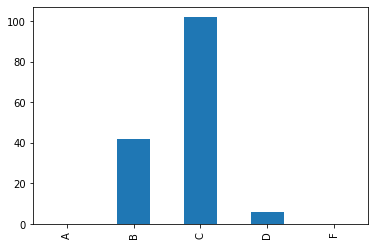

In [36]:
grade_counts = final_data["Final Grade"].value_counts().sort_index()
grade_counts.plot.bar()
plt.show()

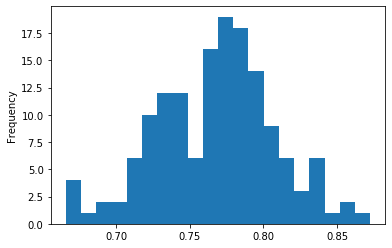

In [37]:
final_data["Final Score"].plot.hist(bins=20, label="Histogram")

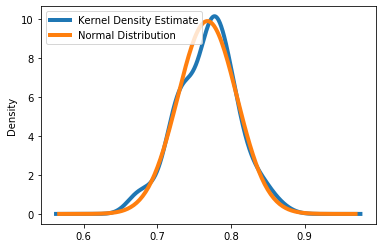

In [40]:
final_data["Final Score"].plot.density(
    linewidth=4, label="Kernel Density Estimate"
)

final_mean = final_data["Final Score"].mean()
final_std = final_data["Final Score"].std()
x = np.linspace(final_mean - 5 * final_std, final_mean + 5 * final_std, 200)
normal_dist = scipy.stats.norm.pdf(x, loc=final_mean, scale=final_std)
plt.plot(x, normal_dist, label="Normal Distribution", linewidth=4)
plt.legend()
plt.show()